In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys

sys.path.append('radex-version-IR_clean_v6/')
# import radexpy.run_plot as radexpy
import pickle
from spectres import spectres
import numpy.ma as ma
import matplotlib.ticker as ticker
from scipy.optimize import minimize
from scipy.stats import chi2

import pandas as pd

In [2]:
with open('ModelData.pkl', 'rb') as f:
    df = pickle.load(f)

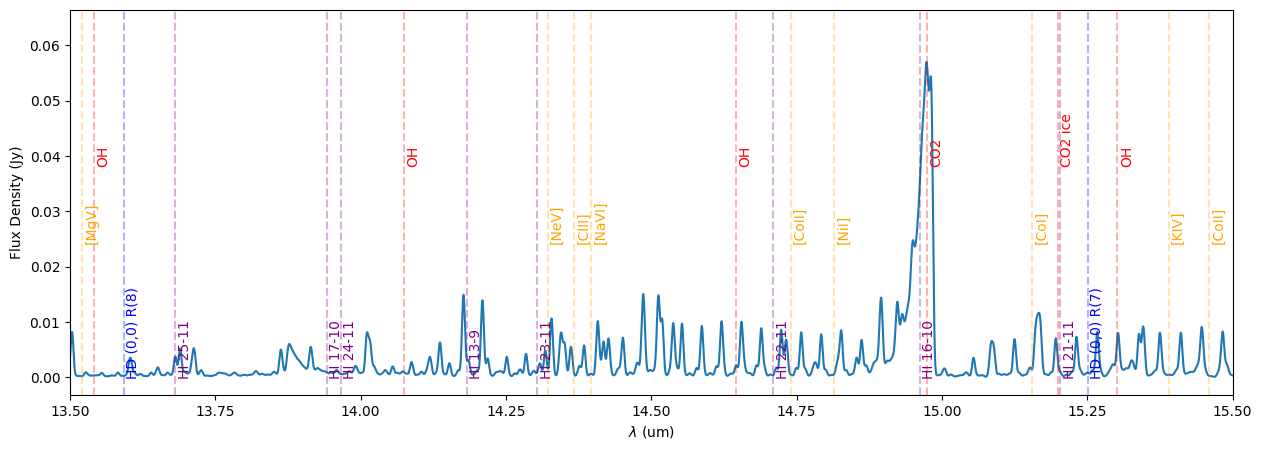

In [9]:
# Load in your model spectrum here

#Load in Matthias' linelist csv file

features_df = pd.read_csv("matthias_linelist_combined.csv")

# Wavelength grid
clip_min, clip_max = 13.5, 15.5
feature_mask = np.logical_and(features_df['wavelength'] > clip_min, features_df['wavelength'] < clip_max)


         
#Plot some models with features subtracted

# plot best fit model, data

fig, (ax1) = plt.subplots(1, 1, figsize=(15, 5), sharex=True)

# Plot your model here
ax1.plot(df['FLiTs Wavelength'][24], df['FLiTs Flux'][24], label='FLiTs')
for index, row in features_df[feature_mask].iterrows():
    if row['type'] == 'hydrogen':
        color = 'purple'
        offset = 0.05
    elif row['type'] == 'fine_structure':
        color = 'orange'
        offset = 0.4
    elif row['type'] == 'molecular':
        color = 'blue'
        offset = 0.05
    else:
        color = 'red'
        offset = 0.6
    ax1.axvline(row['wavelength'], linestyle='--', alpha=0.3, color=color)
    ax1.text(row['wavelength']+0.004, offset, row['name'], transform=ax1.get_xaxis_text1_transform(0)[0], color=color, rotation=90)
         
# plot decorations
ax1.set_xlim(clip_min, clip_max)
ax1.set_ylabel('Flux Density (Jy)')
ax1.set_xlabel(r'$\lambda$ (um)')

# ~ ax1.legend()
plt.show()




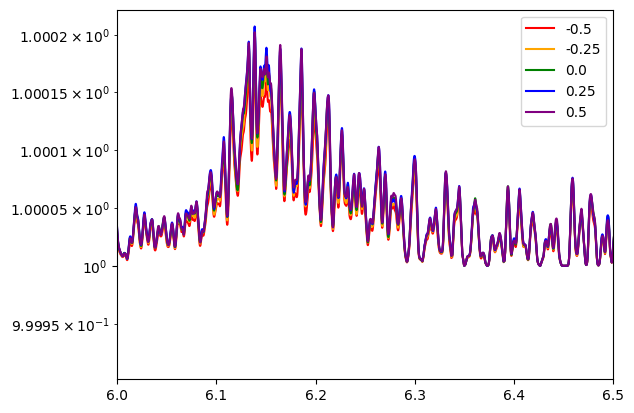

In [13]:
for i in range(5):
    if df['O Value'][i]=='-0.5':
        color = 'red'
    elif df['O Value'][i]=='-0.25':
        color = 'orange'
    elif df['O Value'][i]=='0.0':
        color = 'green'
    elif df['O Value'][i]=='0.25':
        color = 'blue'
    elif df['O Value'][i]=='0.5':
        color = 'purple'
    plt.plot(df['FLiTs NH3 Wavelength'][i], 1+df['FLiTs NH3 Flux'][i], color=color, label=df['O Value'][i])
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
plt.legend(unique_labels.values(), unique_labels.keys())
plt.xlim(6, 6.5)
# plt.ylim(0, 0.0003)
plt.yscale('log')
plt.show()